In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Data preparation

In [2]:
path = "data/"

In [3]:
mnist = pd.read_csv(path + "mnist.csv", header = None)
data_2d = pd.read_csv(path + "data_2d.csv", header = None)

In [4]:
mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


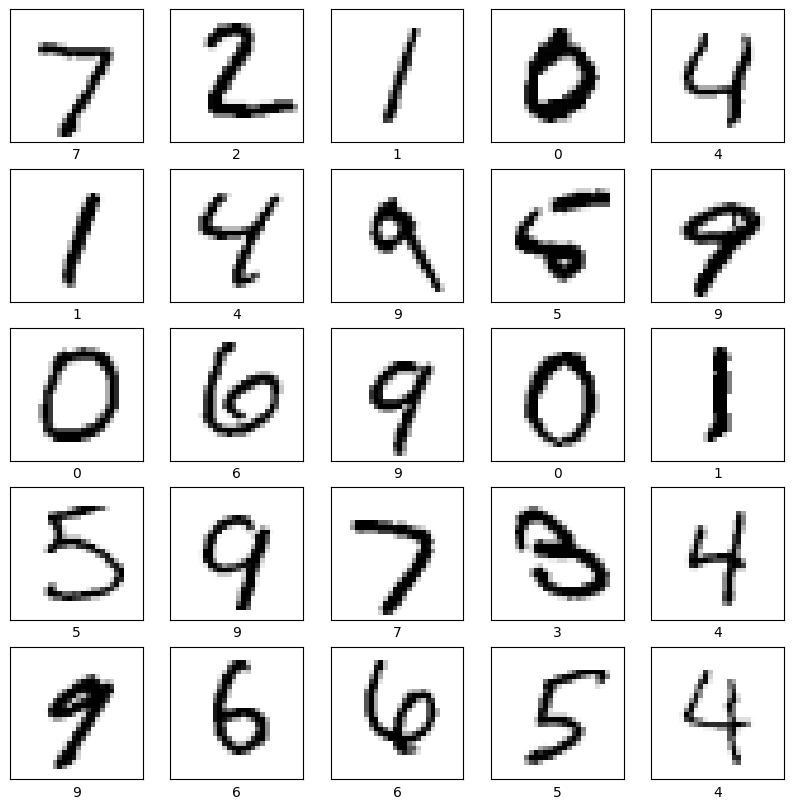

In [5]:
labels = mnist.iloc[:, 0]  # Etykiety cyfr
pixels = mnist.iloc[:, 1:]  # Piksele obrazów

images = pixels.values.reshape(-1, 28, 28)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()

In [6]:
data_2d.head()

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


In [7]:
scaler = StandardScaler()

### Data 2d preparation

In [8]:
data_2d = data_2d.iloc[:, 1:3].values
data_2d_scaled = scaler.fit_transform(data_2d)

### Mnist preparation

In [9]:
pixels_scaled = scaler.fit_transform(pixels)

pca = PCA(n_components=2)
pixels_pca = pca.fit_transform(pixels_scaled)

## Data 2d - Elbow method

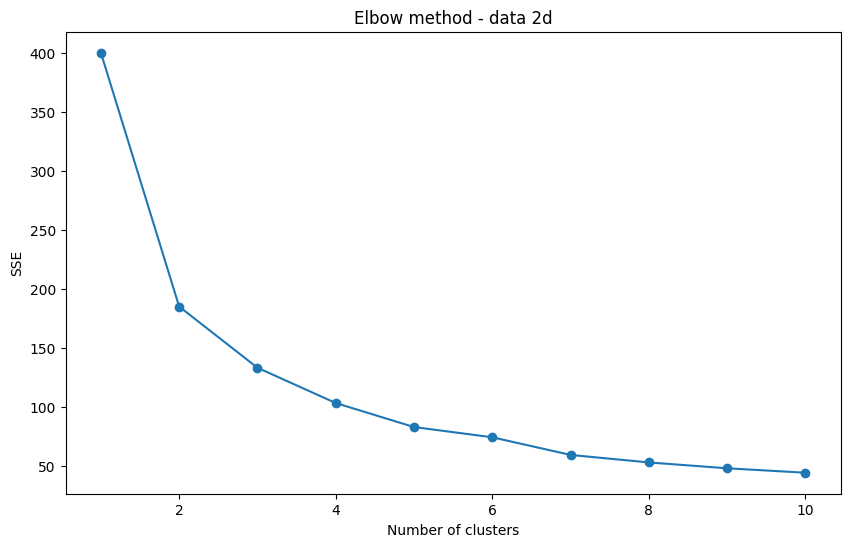

In [10]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_2d_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker="o")
plt.title("Elbow method - data 2d")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

## Mnist data - Elbow method

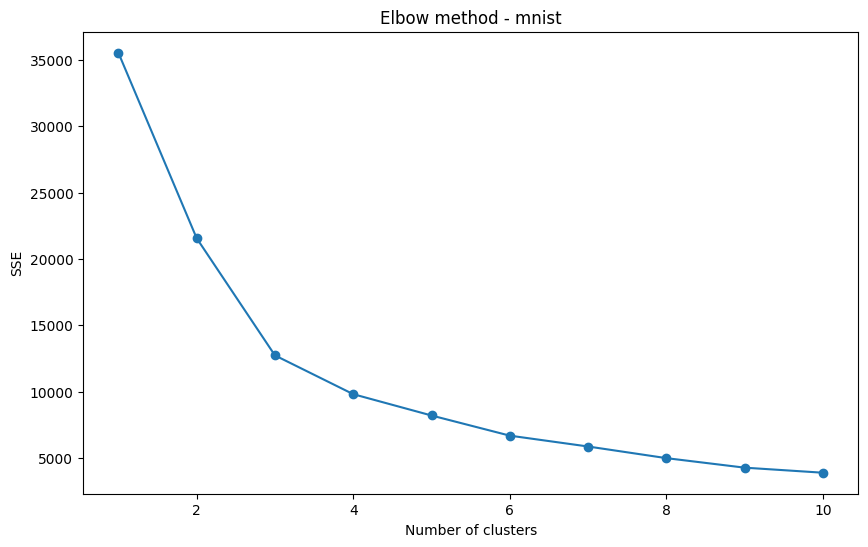

In [11]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels_pca)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker="o")
plt.title("Elbow method - mnist")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

## Vizualization - data 2d

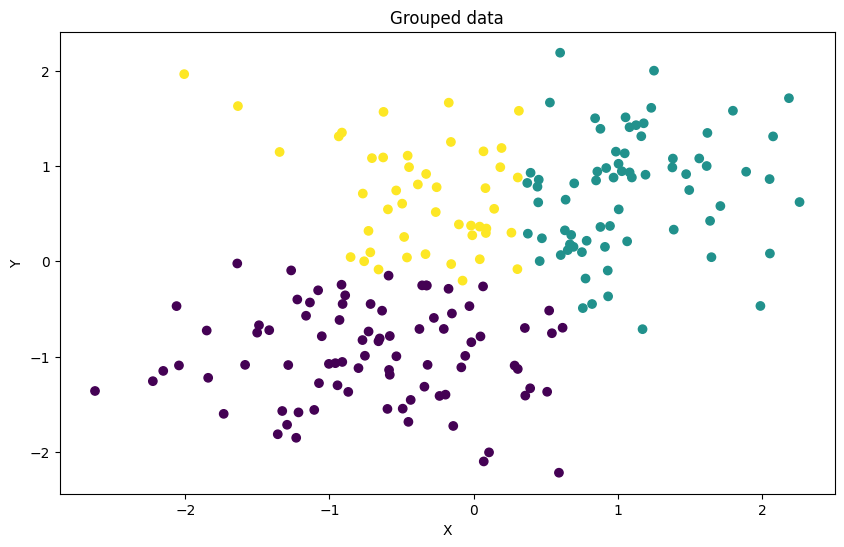

In [12]:
kmeans = KMeans(n_clusters=3, random_state=12)
clusters = kmeans.fit_predict(data_2d_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(data_2d_scaled[:, 0], data_2d_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Grouped data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


## Visualization - mnist

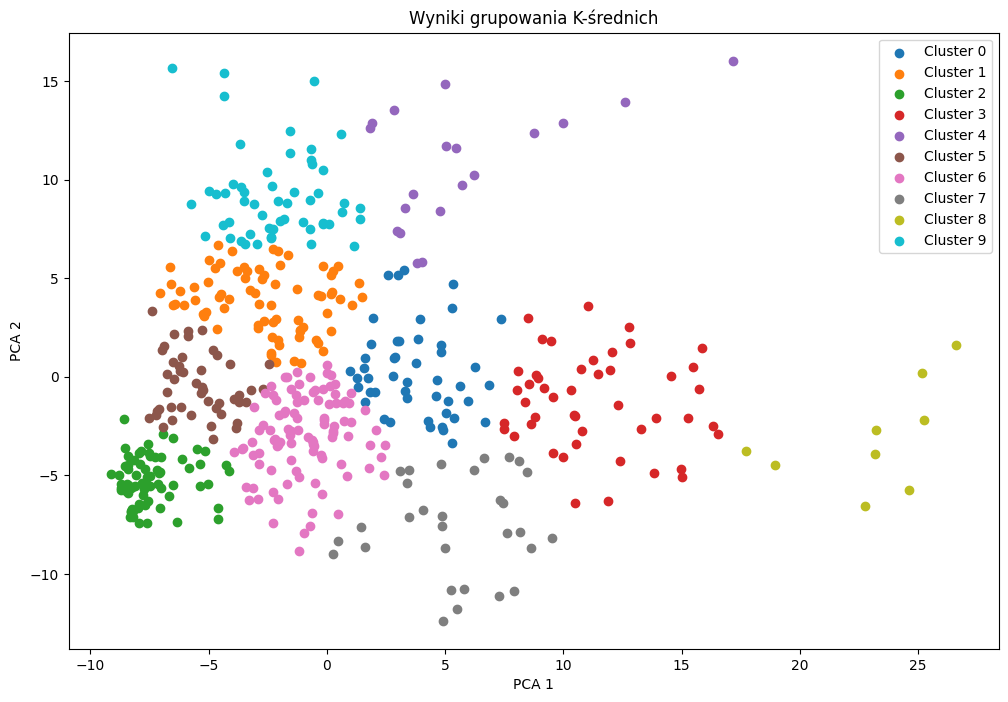

In [13]:
optimal_clusters = 10
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(pixels_pca)

mnist["Cluster"] = clusters

plt.figure(figsize=(12, 8))
for cluster in range(optimal_clusters):
    clustered_data = pixels_pca[clusters == cluster]
    plt.scatter(clustered_data[:, 0], clustered_data[:, 1], label=f"Cluster {cluster}")

plt.title("Wyniki grupowania K-średnich")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()